In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from env import host, user, password
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from math import sqrt
from statsmodels.formula.api import ols

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 


import wrangle3
import explore

In [ ]:
train, X_train, y_train, X_validate, y_validate, X_test, y_test=wrangle3.wrangle()


In [ ]:
explore.age_corr()

 The correlation between the taxvaluedollarcnt of a home and the the logerror: -0.00
 The P value between the taxvaluedollarcnt of a home and the logerror:  0.43
 
Fail to reject the null hypothesis.


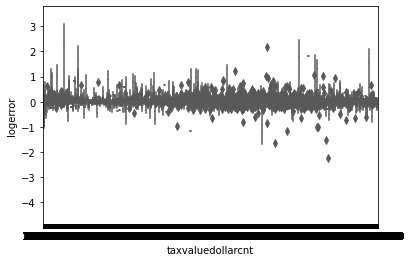

In [2]:
explore.taxvaluedollarcnt_corr()

In [ ]:
X_train['taxvaluedollarcnt']

# Cluster 1: Area

In [ ]:
# Our first cluster - Area
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'
k_range = range(2,20)
explore.find_k(X_train, cluster_vars, k_range)

In [ ]:
# talk to Jared about mapping area on google maps API

# Cluster 2 : Size

In [ ]:
# 2nd cluster - Size
cluster_vars = ['scaled_bathroomcnt', 'sqft_bin', 'acres_bin', 'bath_bed_ratio']
cluster_name = 'size_cluster'
#k_range = range(2,20)

explore. find_k(X_train, cluster_vars, k_range)

In [ ]:
explore.plot_size_clusters()

In [ ]:
sns.relplot(data=X_train, x='longitude', y='latitude', hue='size_cluster', alpha =0.2);

# Cluster 3: Price

In [ ]:
#3rd cluster - Price
cluster_vars = ['taxrate', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin']
cluster_name = 'price_cluster'

explore.find_k(X_train, cluster_vars, k_range)

In [ ]:
explore.plot_prices_clusters()

In [ ]:
sns.relplot(data=X_train, x='longitude', y='latitude', hue='price_cluster', alpha =0.2);

In [ ]:
sns.relplot(data=X_train, x='longitude', y='latitude', hue='logerror_bins', col='size_cluster', col_wrap=2);

In [ ]:
def find_k(X_train, cluster_vars, k_range):
    #enter clusters/features, cluster_name, & range    
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

In [ ]:
# Our first cluster - Area
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'
k_range = range(2,20)
find_k(X_train, cluster_vars, k_range)

In [ ]:
# 2nd cluster - Size
cluster_vars = ['scaled_bathroomcnt', 'sqft_bin', 'acres_bin', 'bath_bed_ratio']
cluster_name = 'size_cluster'
#k_range = range(2,20)

find_k(X_train, cluster_vars, k_range)

In [ ]:

#Plot size clusters
fig, axes = plt.subplots(4,2, sharex=False, figsize=(20, 25))
fig.suptitle('Home prices by Price Cluster')
#axes[0].set_title('All clusters together')
#axes[1].set_title('Cluster a')
#axes[2].set_title('Cluster b')
#axes[3].set_title('Cluster c')
#axes[4].set_title('Cluster d')
#axes[5].set_title('Cluster e')
sns.histplot(data=s0, x='calculatedfinishedsquarefeet', alpha=0.5, color='red', ax=axes[0,0])
sns.histplot(data=s1, x='calculatedfinishedsquarefeet', alpha=0.5, color='orange', ax=axes[0,0])
sns.histplot(data=s2, x='calculatedfinishedsquarefeet', alpha=0.5, color='yellow', ax=axes[0,0])
sns.histplot(data=s3, x='calculatedfinishedsquarefeet', alpha=0.5, color='green', ax=axes[0,0])
sns.histplot(data=s4, x='calculatedfinishedsquarefeet', alpha=0.5, color='blue', ax=axes[0,0])
sns.histplot(data=s5, x='calculatedfinishedsquarefeet', alpha=0.5, color='purple', ax=axes[0,0])
sns.histplot(data=s6, x='calculatedfinishedsquarefeet', alpha=0.5, color='pink', ax=axes[0,0])
axes[0,0].ticklabel_format(style='plain')
axes[0,0].set_title('Size clusters superimposed')
axes[0,1].ticklabel_format(style='plain')
axes[0,1].set_title('Cluster a')

axes[1,0].ticklabel_format(style='plain')
axes[1,0].set_title('Cluster b')
axes[1,1].ticklabel_format(style='plain')
axes[1,1].set_title('Cluster c')
axes[2,0].ticklabel_format(style='plain')
axes[2,0].set_title('Cluster d')
axes[3,0].ticklabel_format(style='plain')
axes[3,0].set_title('Cluster e')
axes[3,1].ticklabel_format(style='plain')
axes[3,1].set_title('Cluster f')

sns.histplot(data=s0, x='calculatedfinishedsquarefeet', alpha=0.5, color='red', ax=axes[0,1])
sns.histplot(data=s1, x='calculatedfinishedsquarefeet', alpha=0.5, color='orange', ax=axes[1,0])
sns.histplot(data=s2, x='calculatedfinishedsquarefeet', alpha=0.5, color='yellow', ax=axes[1,1])
sns.histplot(data=s3, x='calculatedfinishedsquarefeet', alpha=0.5, color='green', ax=axes[2,0])
sns.histplot(data=s4, x='calculatedfinishedsquarefeet', alpha=0.5, color='blue', ax=axes[2,1])
sns.histplot(data=s5, x='calculatedfinishedsquarefeet', alpha=0.5, color='purple', ax=axes[3,0])
sns.histplot(data=s6, x='calculatedfinishedsquarefeet', alpha=0.5, color='pink', ax=axes[3,1])

plt.ticklabel_format(style='plain')

plt.show()

In [ ]:
#3rd cluster - Price
cluster_vars = ['taxrate', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin']
cluster_name = 'price_cluster'
k_range = range(2,20)

find_k(X_train, cluster_vars, k_range)

In [ ]:
sns.relplot(data=X_train, x='longitude', y='latitude', hue='age', col='price_cluster', col_wrap=2);


In [ ]:
X_train['price_cluster'].value_counts()

In [ ]:
#using all three moving forward so just implement the function

In [ ]:
train['logerror']